<a href="https://colab.research.google.com/github/camdsDS/Cesar_Portfolio/blob/main/Mall_Customers_K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("Mall_Customers.csv", index_col = 'CustomerID')
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
X = dataset[["Annual Income (k$)", "Spending Score (1-100)"]]

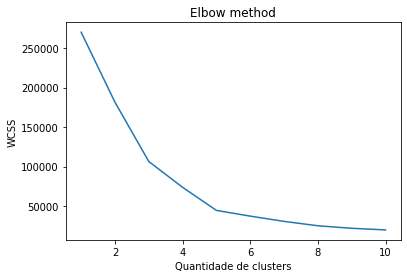

In [4]:
#usando o elbow method para encontrar a melhor quantidade de clusters
from sklearn.cluster import KMeans
wcss = [] #soma dos quadrados intra-clusters (ou do inglês within-clusters sum-of-squares, comumente abreviado para wcss)
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 7)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Quantidade de clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
#pelo gráfico acima sabemos que a quantidade ótima de clusters é 5
#logo, vamos usar n+clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 7)
y_kmeans = kmeans.fit_predict(X)

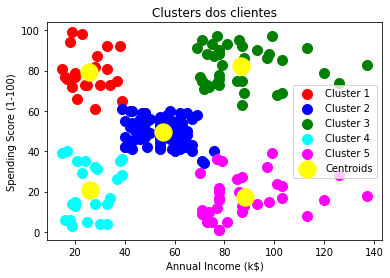

In [6]:
#visualizando os clusters
X = np.array(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters dos clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()